# Javier Palomares Homework 1 b

## 1. Correlations

* When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column. For a warm up, do this: Look at the data in DF1 in HW1b Data.zip.

In [21]:
df1FilePath="./DF1"
df2FilePath="./DF2"

import pandas as pd
df1 = pd.read_csv(df1FilePath,index_col=0)
df2 = pd.read_csv(df2FilePath,index_col=0)
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
0    10000 non-null float64
1    10000 non-null float64
2    10000 non-null float64
3    10000 non-null float64
dtypes: float64(4)
memory usage: 390.6 KB


,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.007704,0.009313,0.007586,-0.008455
std,1.000779,1.002686,1.000794,1.002581
min,-3.471566,-4.056024,-3.524182,-3.930215
25%,-0.663449,-0.663886,-0.666489,-0.697856
50%,0.017736,0.009027,0.012372,-0.007986
75%,0.667565,0.695943,0.672933,0.668582
max,3.854101,3.908736,3.608846,3.985592


 Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn. 

In [37]:
df1.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


Using pandas, we see that columns at position 0 and position 2 are correlated, and columns at position 1 and 3 are negatively correlated

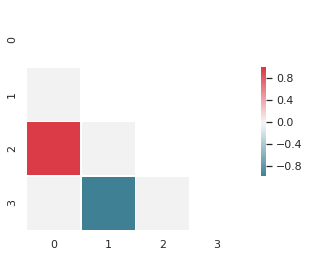

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style='white')
corr1 = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots();

# Generate a custom diverging colorma# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Using seaborn, I can see the correlation between columns 0 and 2, and the negative correlation between columns 1 and 3

* Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

Let DF1 have size $n \times n$.
Let $x_i$ be the i-th column of DF1 and $x_i[j]$ be the j-th component of $x_i$.  
Note that columns of DF1 have $n$ components.
Let $\mu_i$ be the mean of $x_i$ and let $\sigma^2$ be the variance of $x_i$.  
Then the $i,j$ entry of the covariance matrix is given by:

$cov_{ij} =  \frac{1}{n} \sum_{k=1}^{n} (x_i[k] - \mu_i)(x_j[k] - \mu_j) $

In [39]:
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


The values in the covariance matrix are consistent with the values in the correlation as they differ by a normalization factor.

* The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, Z = (X1, X2, X3) so that (X1, X2) and (X1, X3) are uncorrelated, but (X2, X3) are correlated. Specifically: choose a covariance matrix that has the
above correlations structure, and write this down. Then find a way to generate samples
from this Gaussian. Choose one of the non-zero covariance terms (Cij , if C denotes
your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.

In [79]:
def estimateGaussianCov(mean,cov,numSamples,i,j):
    x = np.random.multivariate_normal(mean, cov,numSamples).T
    estCov = np.cov(x)
    c_ij = estCov[i][j]
    error = c_ij - cov[i][j]
    return error

mean = [0,0,0]
cov = [[1,0,0],[0,1,.99],[0,.99,1]]
#c_1,2 is non zero
i = 1
j = 2
numSamples = list(range(10,10000000,100000))
err = np.zeros(len(numSamples))
for k in range(len(numSamples)):
    n = numSamples[k]
    err[k] = estimateGaussianCov(mean,cov,n,i,j)

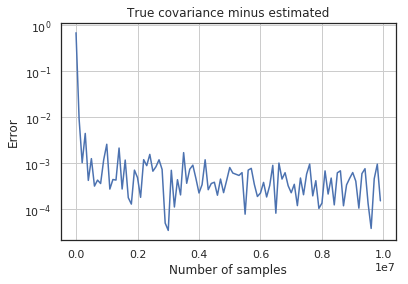

In [85]:
err = abs(err)
plt.semilogy(numSamples,err)
plt.title("True covariance minus estimated")
plt.grid(True)
plt.xlabel("Number of samples")
plt.ylabel("Absolute value of error")
plt.show()

## 2. Outliers
Consider the two-dimensional data in DF2 in HW1b Data.zip. Look at a scatter
plot of the data. It contains two points that look like potential outliers. Which one is “more”
outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is“farther away”
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation. Hint: if $y$ comes from a
standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity
matrix), and
$$
Q=
\begin{pmatrix}
2 & \frac{1}{2}\\
\frac{1}{2} & 2
\end{pmatrix}
$$
what is the covariance matrix of the random variable $z = Qy$?If you are given $z$, how would
you create a random Gaussian vector with covariance equal to the identity, using z?


In [34]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
0    10000 non-null float64
1    10000 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


,0,1
count,10000.000000,10000.000000
mean,0.008139,0.008169
std,1.002321,1.002078
min,-3.471566,-3.524182
25%,-0.663686,-0.666489
50%,0.017736,0.012527
75%,0.667909,0.673805
max,5.500000,5.000000


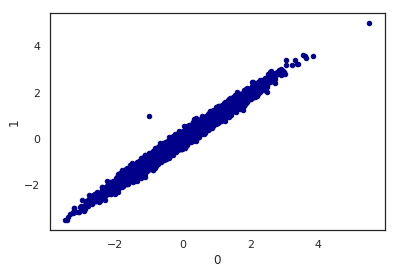

In [46]:
df2.plot.scatter(x=0,y=1,c='DarkBlue')

In [104]:
Q = [[2,1/2],[1/2,2]]
Q_inv = np.linalg.inv(Q)

In [110]:
test = np.dot(Q_inv,df2.T).T

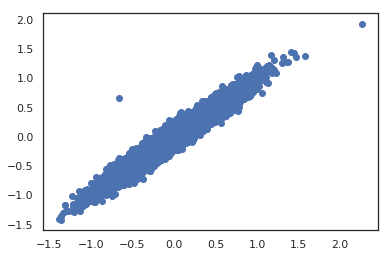

In [111]:
plt.scatter(test[:,0],test[:,1])
plt.show()

In [102]:
test.shape

(10000, 2)

## 3. Even More Standard Error 
(This is to be completed only after you’ve completed the
last written exercise below). In one of the written exercises below, you derive an expression
1for what is called the Standard Error: where $\beta$ denotes the “truth,” $\hat{\beta}$ denotes the value we
compute using least squares linear regression, and $Z$ and $e$ are as in the exercise below, you
find:
$\hat{\beta} − \beta = Ze$.
If we know the distribution of the noise (the distribution generating the noise vectors, e i ),
then we know the distribution for the error, ( $\hat{\beta} − \beta$). This allows us to answer the question
given in class: if we solve a regression and obtain value $\hat{\beta}$, how can we tell if it is statistically
significant? The answer is: we compare the size of β̂ to the spread introduced by the noise
(i.e., the standard error), and we ask: what is the likelihood that the true $\beta = 0$, and what
we observed was purely due to the noise.
If the noise is Gaussian (normal), i.e., $e_i ∼ N(0, \sigma^2 )$, and if the values of the $x_i$ are normalized,
then we expect error of the size $\frac{\sigma}{\sqrt{n}}$, as this is roughly the standard deviation of the
expression for the error that you derive above. This means: if you have twice the data points,
you should expect the error to be reduced by about 1.4 (the formula says that the standard
deviation of the error would decrease by a factor of $1/\sqrt{2}$).
Compute this empirically, as follows: We will generate data for a regression problem, solve
it, and see what the error is: Generate data as I did in the example from class: 
$x_i ∼ N (0, 1)$,
$e i ∼ N (0, 1)$. Generate $y$ by $y_i = \beta_0 + x_i\beta + e_i$ , where $\beta_0 = −3$ and $\beta = 0$. Note that
since  $\beta = 0$, this means that y and x are unrelated! The question we are exploring here is as
follows: when we solve a regression problem, we are not going to find  $\hat{\beta} = 0$ - we will find
that $\hat{\beta}$ takes some other values, hopefully close to zero. How do we know if the value of $\hat{\beta}$ we
get is statistically meaningful?

* By creating fresh data and each time computing $\hat{\beta}$ and recording $\hat{\beta}$ − $\beta$, compute the
empirical standard deviation of the error for n = 150 (the number we used in class). In
class, in the exercise where I tried to find a linear regression of y vs. noise, we found
$\hat{\beta}= −0.15$. Given your empirical computation of the standard deviation of the error,
how significant is the value −0.15?

* Now repeat the above experiment for different values of n. Plot these values, and on the
same plot, plot $1 / \sqrt{n}$. How is the fit?

## Names and Frequencies
The goal of this exercise is for you to get more experience with
Pandas, and to get a chance to explore a cool data set. Download the file Names.zip from
Canvas. This contains the frequency of all names that appeared more than 5 times on a social
security application from 1880 through 2015

* Write a program that on input k and XXXX, returns the top k names from year
XXXX.

In [46]:
import pandas as pd
def topKNames(k,year):
    # read the file containing the name frequency for the year
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
    # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # sort the dataframe by the frequency in descending order
    df= df.sort_values(by='frequency',ascending=False)
    # return the name of the  first k rows of the data
    topKNames = df.iloc[0:k,0]
    return topKNames.to_list()

In [62]:
print(topKNames(7,1990))

['Michael', 'Christopher', 'Jessica', 'Ashley', 'Matthew', 'Joshua', 'Brittany']


* Write a program that on input Name returns the frequency for men and women of the
name $Name$.

In [101]:
# find the frequency of a name in a year for men and women
def freqMFNameByYear(name,year):
    # read the file containing the name frequency for the year
    filepath = "./Names/yob{}.txt".format(year)
    df = pd.read_csv(filepath,header=None)
    # first column of the dataframe is the name, followed by the gender and last by the frequency
    df.columns = ['name','gender','frequency']
    # find the rows for the give name using case insensitive comparison
    rows = df.loc[df['name'].str.lower() == name.lower()]
    # iterate over the rows
    menFrequency = 0
    womenFrequency = 0
    for index,row in rows.iterrows():
        if(row['gender'].lower() == 'm'):
            menFrequency += row['frequency']
        elif(row['gender'].lower() == 'f'):
            womenFrequency += row['frequency']
    return menFrequency,womenFrequency

In [105]:
men,women = freqMFNameByYear("Ashley",1990)
print("{} men were named Ashley in 1990. {} women were named Ashley in 1990".format(men,women))

239 men were named Ashley in 1990. 45553 women were named Ashley in 1990


In [ ]:
df.describe